In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def nonlin(X, T):
    X[X < T] = 0
    X[X >= T] = 1
    return X

def norm_out(W):
    for i in range(W.shape[0]):
        W[i] /= np.sum(W[i])
    return W

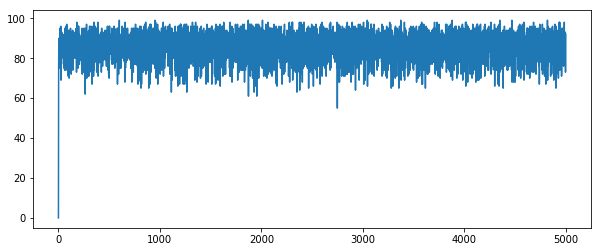

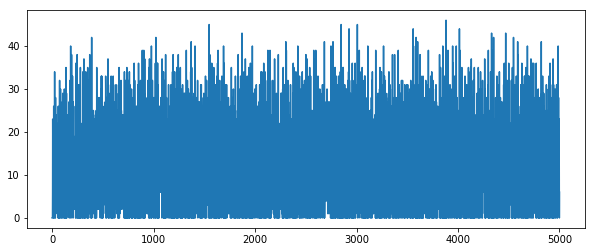

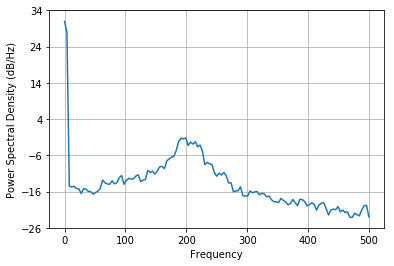

In [8]:
W_MAG_EE = 0.5
W_MAG_EI = 2.0
W_MAG_IE = 0.5
TH_EXC = 1
TH_INH = 1.3

INP_MAG_EXC = 1.9
INP_MAG_INH = 0.5

N_EXC = 100
N_INH = 100

W_EE = norm_out(np.random.uniform(0, 1, (N_EXC, N_EXC)))
W_EI = norm_out(np.random.uniform(0, 1, (N_INH, N_EXC)))
W_IE = norm_out(np.random.uniform(0, 1, (N_EXC, N_INH)))

x_exc = np.zeros(N_EXC)
x_inh = np.zeros(N_INH)

N_STEP = 5000

x_exc_hist = [np.linalg.norm(x_exc)]
x_inh_hist = [np.linalg.norm(x_inh)]

for i in range(N_STEP):
    inp_exc = INP_MAG_EXC * np.random.uniform(0, 1, N_EXC)
    inp_inh = INP_MAG_INH * np.random.uniform(0, 1, N_INH)
    x_exc_new = nonlin(inp_exc + W_EE.dot(x_exc) - W_IE.dot(x_inh), TH_EXC)
    x_inh_new = nonlin(inp_inh + W_EI.dot(x_exc), TH_INH)
    x_exc, x_inh = x_exc_new, x_inh_new
    
    x_exc_hist += [np.sum(x_exc)]
    x_inh_hist += [np.sum(x_inh)]
    
plt.figure(figsize=(10,4))
plt.plot(x_exc_hist)
plt.figure(figsize=(10,4))
plt.plot(x_inh_hist)
plt.figure()
plt.psd(np.array(x_exc_hist), Fs=1000)
plt.show()